### Dataset - Normalized with Min-max method / Without Redshift

#### Random Forest algorithm 

In [159]:
import pandas as pd # for Dataframe manupulation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import numpy as np # for arrays manipulation

In [160]:
df_rf_wr = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_mm_wr.csv")

In [161]:
df_rf_wr

,alpha,delta,u,g,r,i,z,class
0,0.472803,0.677462,0.998994,0.999092,0.527008,0.434177,0.999009,0
1,0.303044,0.572530,0.998695,0.998925,0.527996,0.489885,0.999222,0
2,0.005302,0.362428,0.998932,0.999082,0.555528,0.516271,0.999187,0
3,0.474755,0.380538,0.998767,0.998804,0.388109,0.333769,0.998792,0
4,0.595306,0.213180,0.998691,0.998716,0.350548,0.302683,0.998723,0
...,...,...,...,...,...,...,...,...
56878,0.570563,0.572008,0.998900,0.999043,0.558451,0.497201,0.999193,2
56879,0.036093,0.193240,0.999066,0.999016,0.481001,0.380677,0.998867,2
56880,0.560834,0.539862,0.998664,0.998771,0.407412,0.363928,0.998888,2
56881,0.016374,0.528663,0.998509,0.998588,0.299670,0.277048,0.998685,2


In [162]:
x = df_rf_wr.drop("class",axis='columns')
x.head()

,alpha,delta,u,g,r,i,z
0,0.472803,0.677462,0.998994,0.999092,0.527008,0.434177,0.999009
1,0.303044,0.572530,0.998695,0.998925,0.527996,0.489885,0.999222
2,0.005302,0.362428,0.998932,0.999082,0.555528,0.516271,0.999187
3,0.474755,0.380538,0.998767,0.998804,0.388109,0.333769,0.998792
4,0.595306,0.213180,0.998691,0.998716,0.350548,0.302683,0.998723


In [163]:
y = df_rf_wr["class"]
y

0        0
1        0
2        0
3        0
4        0
        ..
56878    2
56879    2
56880    2
56881    2
56882    2
Name: class, Length: 56883, dtype: int64

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42, stratify=y)

In [165]:
from sklearn.ensemble import RandomForestClassifier

# initializing model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [166]:
y_pred = model.predict(x_test)


In [167]:
from sklearn.metrics import confusion_matrix

# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1715,   77,  104],
       [ 131, 1620,  145],
       [ 169,  228, 1500]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

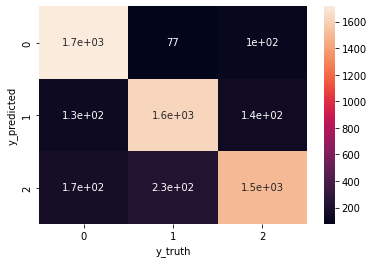

In [168]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [169]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8498857444190543
Precision: 0.8501026666577488
Recall: 0.8498961458873179
F1 Score: 0.8492595479199906


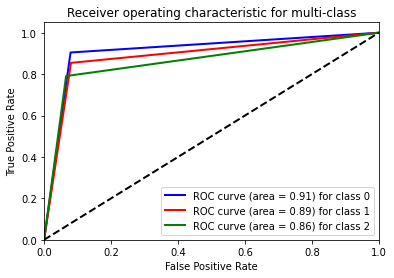

In [170]:
# Plot ROC curve for each class separately

import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### Support Vector Machine (SVM) algorithm

In [171]:
from sklearn.svm import SVC #importing SVC class

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# training the SVM model
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(x_train, y_train)


SVC(C=1, kernel='linear')

In [172]:
y_pred = model_svm.predict(x_test)

In [173]:
from sklearn.metrics import confusion_matrix

# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1083,  173,  640],
       [ 109, 1543,  244],
       [ 385,  542,  970]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

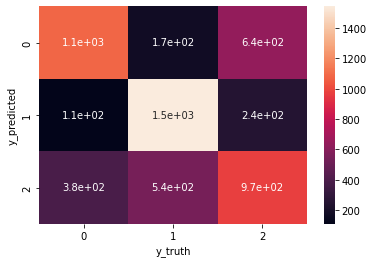

In [174]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [175]:

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6320970293548954
Precision: 0.6310960598734378
Recall: 0.6321182606039443
F1 Score: 0.6279207080090852


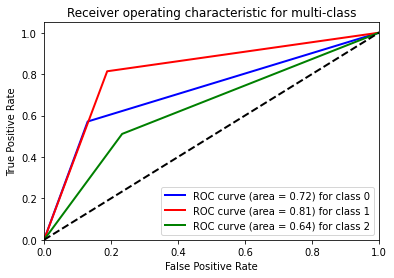

In [176]:
# Plot ROC curve for each class separately

import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### Extremely Randomized Trees (ERT) algorithm

In [177]:
from sklearn.ensemble import ExtraTreesClassifier #importing extra trees classifier

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the ERT model and fit it to the training data
model_ert = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
model_ert.fit(x_train, y_train)

ExtraTreesClassifier()

In [178]:
y_pred = model_ert.predict(x_test)

In [179]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1714,   82,  100],
       [ 135, 1622,  139],
       [ 196,  259, 1442]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

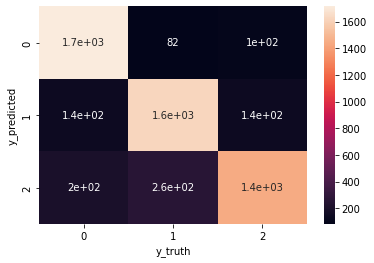

In [180]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [181]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8398664088592019
Precision: 0.8407502767815448
Recall: 0.8398804241206969
F1 Score: 0.8388330575545916


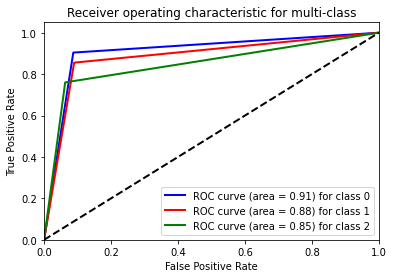

In [182]:
# plotting ROC curve for each class separately

import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

####  Decision Tree algorithm

In [183]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the decision tree model and fit it to the training data
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [184]:
y_pred = model_dt.predict(x_test)

In [185]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1516,  168,  212],
       [ 171, 1458,  267],
       [ 222,  242, 1433]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

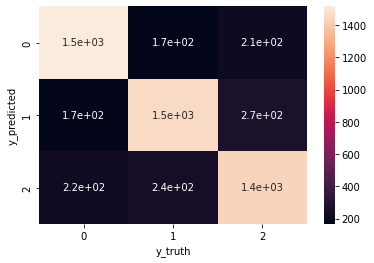

In [186]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [187]:
# calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.774652838811742
Precision: 0.7747079866773997
Recall: 0.7746562230540931
F1 Score: 0.7746608238484655


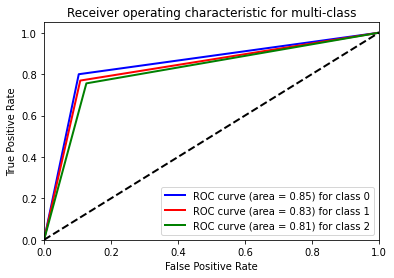

In [188]:
# plotting ROC curve for each class separately

import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### KNN algorithm

In [189]:
from sklearn.neighbors import KNeighborsClassifier # importing KNN module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the knn model and fit it to the training data
model_knn = KNeighborsClassifier(n_neighbors=25)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [190]:
y_pred = model_knn.predict(x_test)

In [191]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1505,  137,  254],
       [ 196, 1524,  176],
       [ 459,  518,  920]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

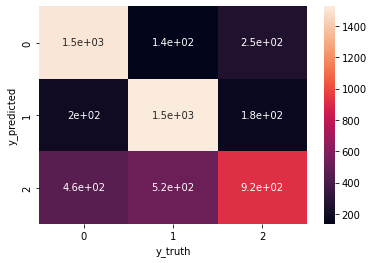

In [192]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [193]:
# calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6941465986992441
Precision: 0.6925480455979921
Recall: 0.694183372665553
F1 Score: 0.6855876154415803


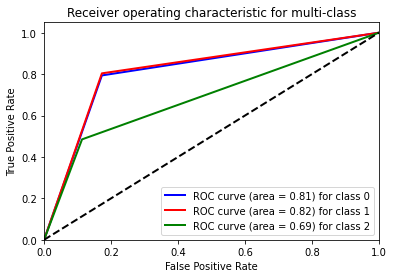

In [194]:
# plotting ROC curve for each class separately

import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### ANN algorithm

In [195]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

y = to_categorical(y, num_classes=3)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the model architecture
model_ann = Sequential()
model_ann.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(3, activation='softmax'))

# Compile the model
model_ann.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model_ann.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/50
1423/1423 [==============================] - 8s 5ms/step - loss: 1.0376 - accuracy: 0.4414 - val_loss: 0.9857 - val_accuracy: 0.4805
Epoch 2/50
1423/1423 [==============================] - 6s 4ms/step - loss: 0.9885 - accuracy: 0.4910 - val_loss: 0.9664 - val_accuracy: 0.5065
Epoch 3/50
1423/1423 [==============================] - 6s 4ms/step - loss: 0.9782 - accuracy: 0.5012 - val_loss: 0.9661 - val_accuracy: 0.5131
Epoch 4/50
1423/1423 [==============================] - 6s 4ms/step - loss: 0.9708 - accuracy: 0.5092 - val_loss: 0.9569 - val_accuracy: 0.5376
Epoch 5/50
1423/1423 [==============================] - 6s 4ms/step - loss: 0.9543 - accuracy: 0.5299 - val_loss: 0.9190 - val_accuracy: 0.5752
Epoch 6/50
1423/1423 [==============================] - 6s 4ms/step - loss: 0.9365 - accuracy: 0.5489 - val_loss: 0.8934 - val_accuracy: 0.5991
Epoch 7/50
1423/1423 [==============================] - 6s 4ms/step - loss: 0.9149 - accuracy: 0.5697 - val_loss: 0.8718 - val_accuracy:

In [196]:
y_pred = model_ann.predict(x_test)

356/356 [==============================] - 1s 2ms/step


In [197]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

Text(33.0, 0.5, 'y_predicted')

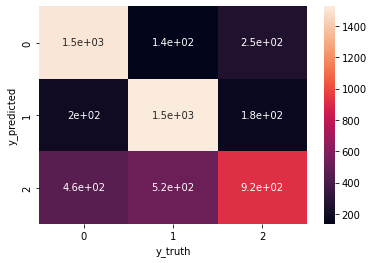

In [198]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [199]:
# calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [ ]:
import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()